In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

# NumPy, SciPy, and Matplotlib
<!-- requirement: images/Sparse_vs_Dense_Matrices.svg -->
<!-- requirement: images/Numpy_Array_Vs_Python_List.svg -->

### Goals

 - What is numpy?: array, ndarray, and some operations
 - What is scipy?
 - Intro to matplotlib

In [2]:
# These are the standard "qualified" (as) imports
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # makes plots pretty

## NumPy

If you've ever used MATLAB, you know that writing out loops to add two vectors / find dot products / multiply two matrices / etc. is possible but _very_ slow.  Instead, you should use "vectorized" built-in operations that can do the looping in a faster language or even pick a better algorithm.

Python is similar.  _Numpy_ is the package that provides the means to do performant numerical calculations in Python.  If you've converted your problem into linear algebra and matrices, then _numpy_ will let you write it to run fast.

**Why are Python arrays unsuitable for numerical computation?**

There are two basic reasons why Python on its own is insufficient here:
  - _Data structure._  A Python list is a complicated thing. Just consider something like:
        
           x = [1, "23", BeautifulSoup(urllib2.urlopen("https://www.google.com/#q=4")), 5]
    
    where x[0] and x[3] are numbers (of some sort), x[1] is a string, and x[2] is a complicated object.  If you're familiar with a low-level language like C, just imagine how this must be stored in memory: 
    
    > In the typical Python implementation, this might be stored as a linked list of pointers to "Python object" data structures which in turn store what class the object is an instance of, a pointer to a dictionary (i.e. hash table) of instance variables, and a pointer to a dictionary of class variables.  This is reasonable for x[2], but for x[0] and x[3]...
    
  - _Typing and dispatch._  When we write `x[0] + x[3]`, what happens?  You can overload `+` for all sorts of purposes in Python, and the decision of exactly what `+` means happens at run-time by a dictionary lookup.  If you were term-wise adding two arrays, `x` and `y`, then because arrays can contain elements of different types this has to happen _for each term_.

**What numpy does for us:**

The basic thing that `numpy` does is avoid these two problems by using ordinary C-style arrays of integers, floating point numbers, etc., along with functions that operate on them intelligently. It also gives us C-style higher dimensional arrays.

Note that C-style arrays are good for more than just quickly performing operations through Python; they're also good for talking to existing C and Fortran code. This interoperability explains why `numpy` matters to you even if you won't do any matrix computations by hand: many of the libraries that you _will_ want to use will use `numpy` arrays under the hood.

![Numpy Array vs. Python List](images/Numpy_Array_Vs_Python_List.svg "Numpy Array vs. Python List")
[comment]: https://docs.google.com/drawings/d/1qsm90ZnesvtRr0_Y_hpJag5nragWv4fmkmfpBZRbxCQ/edit

## Data types (the nouns):

### `np.array`
This is a C-style array. That is, it is just a big contiguous block of integers (or floats, or... but just one type per array) of fixed length.

### `np.ndarray`
This is a C-style "n-D" array.  That is, it is **also** just a big contiguous block of integers (or...) together with a factorization of its size into "dimensions"
  
  $$       N = n_1 n_2 ... n_d        $$
  
  In other words the arrays that you might denote [1,2,3,4] and [[1,2],[3,4]] have the same underlying block of values, just with different dimensions: the first one has [4], while the second [2,2].
  
 For an alternate visual: Imagine a grid and numbering it by reading left to right -- next row -- left to right -- next row, etc.   For instance, in C the following bits of code are functionally equivalent
  
  >        
          int chessboard[64];
          //Do something
          chessboard[8*row + column] += 1;
  
  and
  
  >        
          int chessboard[8][8];
          //Do something
          chessboard[row][column] += 1;
          
  In this case the numbering (i.e. mapping to a single flat list of numbers) goes
  >        
          0  1  2  3  4  5  6  7
          8  9 10 11 ..
          16 ..
          ..


In [5]:
X = np.empty((2,3))  # allocates memory but does not write to it (dangerous)
X

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [6]:
Y = np.zeros((2,3))  # array of all zeros
Y

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [7]:
X.shape == Y.shape

True

In [8]:
Z = np.ones((2,3))  # array of all ones
Z

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [9]:
Y.shape == Z.shape

True

In [10]:
Z2 = np.ones_like(Y)  # array of ones with the shape of Y

In [12]:
Z == Z2

array([[ True,  True,  True],
       [ True,  True,  True]], dtype=bool)

In [13]:
np.all(Z == Z2)

True

In [14]:
np.all(Z - Z == Y)

True

### `np.matrix`

The case of 2D arrays, or "matrices," is given a special wrapper with different operations.  These are slightly different than arrays, which we'll explain later.

In [15]:
x = np.matrix(range(5))
y = np.arange(5)
np.all(x == y)

True

In [16]:
type(x) is type(y)

False

In [17]:
import numpy.matlib  # this import is oddly necessary for matrix code to work
matrix_I = np.matlib.identity(3)
array_I = np.eye(3)

np.all(matrix_I == array_I), type(matrix_I) is type(array_I)

(True, False)

## Operations (the verbs):

In broad types the things we can do are:
  - Create arrays.
  - Slicing or reshaping: Taking a sub-block of a block of values.  Both slicing and reshaping are  examples of a "view" or a "shallow copy," because they do not actually copy the underlying block of data.
  - "Universal functions": This is numpy's name for functions that are applied term-by-term, like the arithmetic operations or `sin`.
  - Linear algebra / matrix operations.
  - Mathematical convenience functions: FFT, etc.
  
Here's a table that shows some example syntax:
  
   Command  |  Explanation
   ---------|--------------
  `np.array(python_list[, dtype='int'])` | Convert a Python list to an np array.  The dtype can be one of several things, such as 'int64', 'float32', 'float64', etc.
  `np.ndarray(shape=[1,2,3], buffer=an_np_array, dtype='int')`  | Makes a higher dimensional array whose underlying block of data is the given np_array.
  `np.arange(-5,5,1)` | Like Python's range, but slightly faster than np.array(range(-5,5,1)).
  `+`, `*`, `-`, `/`, `np.sin`, ... | All of the standard numerical and mathematical functions are back.  They always operate term-by-term.  That is, `x+y` is ordinary vector addition but `x*y` is term-wise product (not dot product).
   `np.dot(x,y)` or `x.dot(y)` | Inner product (along the last dimension, for n-D arrays).  Note that this includes matrix multiplication for 2-D arrays.
   `an_np_array.reshape([1,2,3])`  |  Reshape an np.array or np.ndarray to one with different shape (but of the same size).
   
All pretty simple!  Let's do a few quick examples.

In [ ]:
x = np.arange(-5, 5, 1)  # Numpy will make intelligent guesses about your intended data type
x                        # And will convert between them if needed:

In [ ]:
y = np.sin(x)
y

In [ ]:
x.dtype, y.dtype

In [ ]:
np.linspace(-5, 5, 10)

In [ ]:
np.logspace(0, 4, 9)

Basic math operations:

In [ ]:
2 * x

In [ ]:
x * x

In [ ]:
np.dot(x, x)

In [ ]:
x.dot(x)

In [ ]:
np.sqrt(x**2 + y**2)

In [ ]:
np.outer(x, x)

In [ ]:
np.outer(x, x).dot(x)

**Question:** How would you multiply two matrices?

You can do basic stats on ndarrays:

In [ ]:
# You can do basic stats on ndarrays:
x.mean(), x.std()

You can reshape an array, as long as the number of elements remains the same.  Note that the result of a reshape is a view onto the same data.  Changing one will change the other.

In [ ]:
z = x.reshape(2, 5)
z

In [ ]:
z[1,1] = 10
x

In [ ]:
x.reshape(5, -1)

You can also create an array of arbitrary shape and type:

In [ ]:
np.ndarray(shape=(2,3,3), dtype=int, buffer=np.arange(1,100))

### Gotchas

1. Matrix multiplication, on arrays, is denoted by `A.dot(B)`.  Transpose is denoted by `A.T`.  Fair enough. 
2. If `A` is a 1-D array, then we often think of it as a vector.  This will usually give you the right "linear algebra notation" answer, e.g. if `M` is a 2-D array of the right size then
        A.dot(M)
        M.dot(A)
   represent the matrix products you think (where `A` is turned into a row or column vector as needed).
   
   If `A` is a 1-D array, then it is not the case that `A` is always a row (or column) vector -- numpy makes creative guesses about how to interpret it as a higher dimensional array.  For instance: `A.dot(A.T) = A.dot(A) = np.dot(A,A)` is the ordinary scalar dot product.  For the matrix outer product $A^T A$ one must use `np.outer(A)` or _explicitly reshape_ `A` as a column vector, i.e. a 2-D array with just one column:

In [ ]:
v = x[:, np.newaxis]
np.all(v.dot(v.T) == np.outer(x, x))

### Performance of numpy arrays vs. python lists

It's much faster to use numpy arrays than python lists.

In [ ]:
xl = range(10000)
yl = range(10000)
xa = np.arange(10000)
ya = np.arange(10000)

In [ ]:
%%timeit -n3

[i + j for i, j in zip(xl, yl)]

In [ ]:
%%timeit -n3

xa + ya

### Array indexing

Numpy provides lots of ways to index into lists.

In [ ]:
x = np.arange(10)
y = x[2:5]  # like python list indexing
len(y)

In [ ]:
# what's the difference?
x[2:3], x[2]

In [ ]:
# select based on a condition
x[x % 2 == 1]

Numpy allows you to play fast and loose with indexing

In [ ]:
A = np.empty((3,4))

# Constant assigned to entire row
for i in xrange(A.shape[0]):
    A[i] = 2. * i
    
print A

You can also pass in a list (or `np.array`) of indices

In [ ]:
X = 2. * np.arange(10)
X[range(9,-1,-1)]  # The reverse of the list

In [ ]:
X[range(9,-1,-1)] = 3. * np.arange(10)   # Assign to the reverse of this list
X

### Conditional selection and max / min

The `np.where` construct allows you to take values from one array when a condition is true and the values from another array when they are false.

In [ ]:
x = np.arange(10)
np.where(x > 5, x, 0)

This can also be done manually, by taking advantage of the fact that `True` and `False` behave like `1` and `0` in math statements in Python.

In [ ]:
(x > 5) * x + 0 * (x <= 5)

`np.maximum` and `np.minimum` can compare two arrays or an array to a constant.

In [ ]:
x = np.arange(10)
y = np.arange(9, -1, -1)
print "The larger of x and y"
print np.maximum(x, y)
print 
print "x capped at 5"
print np.minimum(x, 5)

### Transpose

A numpy array has two methods to transpose a matrix, `.T` and `.swapaxes`

In [ ]:
A = np.arange(24).reshape(4,6)
A.T

In [ ]:
At = A.swapaxes(0,1)
np.all(A.T == At)

### Matrix manipulations

Numpy can do all the basic matrix manipulations from linear algebra.

In [ ]:
A = np.arange(10)

# note the way you can "promote" a vector to a matrix
v = A[:, np.newaxis]

A.shape, v.shape

In [ ]:
A.dot(A.T), A.T.dot(A)

In [ ]:
v.dot(v.T), v.T.dot(v)

### Matrix Inversion

While you can invert a 2-D numpy array using `np.linalg.inv`, it is recommended that you use `np.linalg.solve`, which is much more efficient

In [ ]:
A = np.array([[3,1], [1,2]])
x = np.array([9,8])
np.linalg.solve(A, x)

### Singular Value Decomposition

Finally, you can do the [SVD decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition) of a 2-D numpy array

In [ ]:
A = np.arange(24).reshape(4,6)
U, x, V = np.linalg.svd(A)
diag = np.zeros((4,6))
diag[range(4), range(4)] = x
diff = U.dot(diag).dot(V) - A

np.abs(diff).max()

## Persisting numpy objects

You can save numpy objects as using `np.save` and `np.load` functions.  You can also save multiple numpy objects using the `np.savez` function.

In [ ]:
x = np.arange(10)
np.save('/tmp/x.npy', x)
del x
y = np.load('/tmp/x.npy')
np.all(y == np.arange(10))

**Exercises:**
Write a one-line function, which when given a random `np.array`:
1. returns the range (max - min)
1. returns the normalized random variable (subtract the mean and divide by standard deviation)
1. returns the value closest to the mean

Additional exercises:
1. Create a $4 \times 4$ identity matrix.
1. Generate the 2D array
```
1 2 3
4 5 6
7 8 9
```
(without typing it out).
1. Generate a random $4 \times 4 \times 4$ array of Gaussianly distributed numbers.
1. Generate `n` evenly spaced intervals between 0 and 1.
1. Create an $8 \times 8$ `np.ndarray` representing a chess board where the red squares are 1 and the white squares are 0.

Looking for more?  Check out  the Neophyte, Novice, and  Apprentice levels [here](http://www.loria.fr/~rougier/teaching/numpy.100/).  They get unnecessarily complicated after that.

## Matplotlib

_Matplotlib_ lets you plot things, and _pyplot_ is a layer on top of it to give it a MATLAB-like syntax.  It is covered in more depth in our *visualization* module, but for now we'll just briefly give examples of

- Line plots
- Bar plots and histograms
- Scatter plots

### Line plot

Matplotlib can do basic X-Y plots if you give it the `x` and `y` data of equal length.  Here is a plot of a few sample paths of Brownian Motion.

Notice that calling `plt.plot` multiple results in multiple lines on the same figure.  Call `plt.figure` to create a new figure.

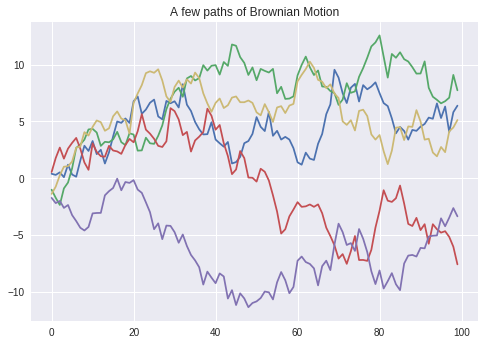

In [18]:
# Line plot example
xs = np.random.randn(5, 100)

plt.title("A few paths of Brownian Motion")
bms = xs.cumsum(1)
for bm in bms:
    plt.plot(bm)

### Scatter plot

Matplotlib can generate 2D scatter plot data.

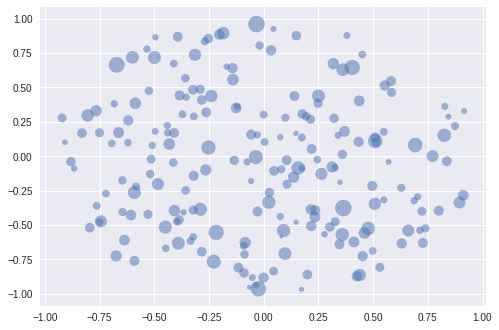

In [19]:
# Generate randomly sampled dots within the unit circle, with gamma-distributed radius
N=250
A=20
xo,yo = np.random.uniform(low=-1, high=1, size=N), np.random.uniform(low=-1, high=1, size=N)
so = A*np.random.gamma(4.5, 1.0, size=N)

x = xo[xo**2+yo**2 < 1]
y = yo[xo**2+yo**2 < 1]
s = so[xo**2+yo**2 < 1]

# Scatter plot, with _s_izes and translucent circles
plt.scatter(x, y, s=s, alpha=0.5)

### Histograms

Matplotlib can also plot historgrams from raw count data.

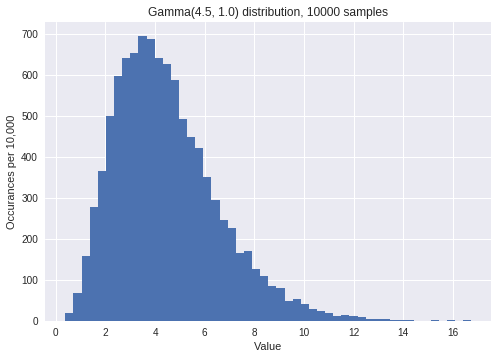

In [20]:
data = np.random.gamma(4.5, 1.0, 10000)
plt.hist(data, bins=50)
plt.title("Gamma(4.5, 1.0) distribution, 10000 samples")
plt.xlabel("Value")
plt.ylabel("Occurances per 10,000")
plt.show()

### Images

Matplotlib can plot arrays as 2D images, using a color map that you specify.

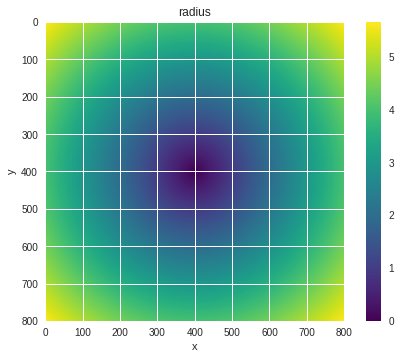

In [21]:
a = np.arange(-4, 4, 0.01)

x, y = np.meshgrid(a, a)
assert(x.shape == (len(a), len(a)))
r = np.sqrt(x ** 2 + y ** 2)
plt.imshow(r, cmap=plt.cm.viridis)
plt.colorbar()
plt.title("radius")
plt.xlabel("x")
plt.ylabel("y")

### Exercises
1. Generate an `np.array` of normally distributed samples and plot them using the histogram function.  Overlay with a 2D plot of the standard normal pdf function.  What happens as the number of random samples increases?

## SciPy

_Scipy_ hooks into efficient implementations (in C and Fortran) of a variety of numerical techniques:

- numerical integration 
- numerical differentiation 
- optimization and root finding
- distributions
- sparse linear algebra  <small>(`numpy` is for _dense_ linear algebra)</small>
- and more

The input / output from these commands often involves numpy arrays.

### Optimization

Scipy can be used for root finding an optimization.  Among the functions supported are are

1. [root](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.root.html) which finds the roots of arbitrary python funcitons you pass in
1. [linprog](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html) which solves linear programming problems subject to equality and inequality constraints.
1. [minimize](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.optimize.minimize.html) which minimizes arbitrary functions using various methods like Powell, conjugate gradient, BFGS, LBFGSB, Newton CG, etc ...

### Root

In [ ]:
function = lambda x: x**2 - 2
result = sp.optimize.root(function, 4)

x = np.arange(-1., 2., .1-1e-9)
y = function(x)
plt.plot(x, y)
plt.plot([result['x']], result['fun'], 'o', markersize=10)

### Minimize

In [ ]:
function = lambda x: (x-2)**2
result = sp.optimize.minimize(function, 4)

x = np.arange(-1, 3, .1-1e-9)
y = function(x)
plt.plot(x, y)
plt.plot([result['x']], result['fun'], 'o', markersize=10)

### Statistics

Numpy and scipy can generate random numbers using functions in the `np.random` namespace.  Numpy arrays also have some built-in statistical methods.

In [ ]:
x = np.random.randn(100)  # random standard normal of size 100
x.mean(), x.std(), x.sum()

Numpy also also supports more complex statistical functions.

In [ ]:
np.percentile(x, 10), np.median(x), np.percentile(x, 90)

Scipy has strong support for data from different distributions.  Each distribution is represented by a class

It also supports various continuous and discontinuous distributions, such as
- [Bernoulli](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html#scipy.stats.bernoulli)
- [Beta](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html#scipy.stats.beta)
- [Binomial](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom)
- [Cauchy](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html#scipy.stats.cauchy)
- [Chi-Squared](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html#scipy.stats.chi2)
- [Exponential](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon)
- [Gamma](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html#scipy.stats.gamma)
- [Normal](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm)
- [Poisson](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson)
- etc ...

which supports several methods, including

- [`rvs`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.rvs.html#scipy.stats.rv_continuous.rvs): generating random variates
- [`pdf`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.pdf.html#scipy.stats.rv_continuous.pdf):  returning the PDF of a distribution
- [`logpdf`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.logpdf.html#scipy.stats.rv_continuous.logpdf): returning the log PDF of a distribution
- [`cdf`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.cdf.html#scipy.stats.rv_continuous.cdf): returning the CDF of a distribution
- [`mean`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.logpdf.html#scipy.stats.rv_continuous.mean): returns the mean
- [`var`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.logpdf.html#scipy.stats.rv_continuous.var): returns the variance
- [`std`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.logpdf.html#scipy.stats.rv_continuous.std): returns the standard deviation
- [`moment`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.moment.html#scipy.stats.rv_continuous.moment): returning the n-th moment
- [`stats`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.stats.html#scipy.stats.rv_continuous.stats): returning various statistics
- etc ...

which can be instantiated with standardized parameters.

In [ ]:
cauchies = [(loc, sp.stats.cauchy(loc=loc, scale=1.)) for loc in (-1, 0, 1)]
x = np.arange(-3., 3., .05-1e-9)
for loc, cauchy in cauchies:
    plt.plot(x, cauchy.pdf(x), label="loc=%+d" % loc)
plt.legend()
plt.title("Cauchy PDFs")

In [ ]:
gammas = [(a, sp.stats.gamma(a=a)) for a in range(1,8)]
x = np.arange(0., 10., .1-1e-9)
for a, gamma in gammas:
    plt.plot(x, gamma.cdf(x), label="a=%d" % a)
plt.legend(loc='lower right')
plt.title("Gamma CDFs")

### Sparse Matrices

Sparse matrices are great for matrices that are mostly zeros.  There are many formats, which each have different advantages:
- [COO](http://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html#scipy.sparse.coo_matrix): this is the easiest class to construct, but bad at computation
- [CSC](http://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_matrix.html#scipy.sparse.csc_matrix): also called column-based, these are good for column-slicing but poor at row slicing.
- [CSR](http://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_matrix.html#scipy.sparse.csc_matrix): also called row-based, these are good for row-slicing but poor at column slicing.
- [DIA](http://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.dia_matrix.html#scipy.sparse.dia_matrix): also called diagonal storage, these are great for diagonal matrices.

![Sprase Vs. Dense Matrices](images/Sparse_vs_Dense_Matrices.svg "Sprase Vs. Dense Matrices")
[comment]: https://docs.google.com/drawings/d/1s9JQVUPO4RJnAFdcWFG-Xxz_-m0oJv7yvvK3EE00SAM/edit

In [ ]:
def shift_matrix(n):
    matrix = sp.sparse.dia_matrix(((np.ones(n), np.ones(n)), (1,1-n)), shape=(n,n))
    return matrix

print shift_matrix(4)
shift_matrix(4).todense()

We can see that dense matrix multiplication is slower than sparse matrix multiplication

In [ ]:
N = 1000
T = 50
m_dense = shift_matrix(N).todense()
m_sparse = shift_matrix(N).tocsr()

In [ ]:
%%timeit

v0 = np.arange(N).reshape((N,1))
for _ in xrange(T):
    v0 = m_dense * v0

In [ ]:
%%timeit

v0 = np.arange(N).reshape((N,1))
for _ in xrange(T):
    v0 = m_sparse * v0

**Exercises:**
1. Linear regression is a *Least Squares* model because it minimizes the potential function
$$ \sum_i (y_i - (b_0 + b_1 X_{1i} + \cdots b_p X_{pi}))^2 $$
Use the matrix operations provided by numpy and the optimization routines provided by scipy to write your own least-squares routine.  Check the result using `numpy.linalg.lstsq`.

1. Generate some noisy data fitting the model $y = e^{-a x} + b + \epsilon$ where $\epsilon$ is random Gaussian noise and $a>0$ and $b$ are real numbers.  Use `scipy.optimize.curve_fit` to git the data to the parametric form $f(x) = e^{-a x} + b$ and check that you can recover the values of $a$ and $b$.

1. Generate an `np.array` of normally distributed samples and apply the normal cdf to them pointwise (`scipy.stats.norm.cdf`).  Generate the histogram.  Can you figure out what distribution this approaches as the number of samples increases?

### Exit Tickets
1. What do we mean by "efficient" implementations of mathematical operations?
1. Identify the aspects of Python responsible for its relatively slow performance. What benefits do we get in return?
1. Libraries like numpy and scipy offer substantial benefits. What are some of their drawbacks?
1. (*extension*) How do you decide when to import functionality and when to implement it yourself?

*Copyright &copy; 2015 The Data Incubator.  All rights reserved.*